<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction - Part VI - Model Selection and Fine Tuning & Model Evaluation

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Download & Save tmdb_model to my Google Drive

In [ ]:
# Import necessary libraries
import pickle
from google.colab import drive

# Save tmdb_filtered as tmdb_eng

tmdb_eng=tmdb_model

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_ready DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_model, file)
  print(f"tmdb_model saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_eng is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_model saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl


#Importing Pickel file tmdb_model from my Google Drive

In [ ]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_model = pickle.load(file)
    print(f"tmdb_model loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_model)
    # For example, you can display the first few rows:
    print(tmdb_model.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive
tmdb_model loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl successfully.
   name        id  number_of_episodes  vote_count       first_air_date  \
0    11   39280.0           -0.737903   -0.407878 -9223372036854775808   
1    43  222838.6           -0.362186    0.741789  1685232000000000000   
2   279  222838.6            0.013532   -0.407878  1400112000000000000   
3     1   34835.0            0.163818    3.424345  1160092800000000000   
4  5774   42598.0           -0.737903   -0.407878 -9223372036854775808   

         last_air_date  type  genres  created_by  languages  networks  \
0 -9223372036854775808     4      40       13284          7       178   
1  1687651200000000000     4      40       13302         20       169   
2  1405555200000000000     4      40       13284          7       178   
3  1166745600000000000     4      58       13284         20       178   
4 -9223372036854775808     4      21       13284      

# Imbalance Teqnics for the tmdb_model Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression  # Or any other classifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Define a binary target based on 'popularity' (Adjust the threshold as needed)
median_popularity = tmdb_model['popularity'].median()
tmdb_model['success'] = (tmdb_model['popularity'] > median_popularity).astype(int)

# 2. Define features (X) and target (y)
X = tmdb_model.drop(columns=['popularity', 'success'])
y = tmdb_model['success']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define resampling techniques
techniques = {
    "ROS": RandomOverSampler(random_state=42),
    "RUS": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# 5. Apply resampling and train a model
for technique_name, technique in techniques.items():
    # Resample the training data
    X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)

    # Initialize and train the model (e.g., Logistic Regression)
    model = LogisticRegression(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Results for {technique_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")

Results for ROS:
Accuracy: 0.7573
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.70      6350
           1       0.69      0.94      0.79      6417

    accuracy                           0.76     12767
   macro avg       0.79      0.76      0.75     12767
weighted avg       0.79      0.76      0.75     12767


Results for RUS:
Accuracy: 0.7573
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.70      6350
           1       0.69      0.94      0.79      6417

    accuracy                           0.76     12767
   macro avg       0.79      0.76      0.75     12767
weighted avg       0.79      0.76      0.75     12767


Results for SMOTE:
Accuracy: 0.7573
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.70      6350
           1       0.69      0.94      0.79      6417

    acc

# 6. Model Selection and Fine Tuning

Model Selection: Choose appropriate machine learning models based on the problem at hand (e.g., regression, classification, clustering).



# Support Vector Machine

SVM is a supervised ML Algorithm which can be used for both classification and regresstion models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Using 'tmdb_model' as DataFrame

df = tmdb_model.copy()  # Create a copy of the DataFrame
df

,name,id,number_of_episodes,vote_count,first_air_date,last_air_date,type,genres,created_by,languages,networks,origin_country,production_companies,air_time,log_popularity,total_runtime,popularity,success
0,11,39280.0,-0.737903,-0.407878,-9223372036854775808,-9223372036854775808,4,40,13284,7,178,511,86,56.0,0.904220,-0.532649,0.470004,0
1,43,222838.6,-0.362186,0.741789,1685232000000000000,1687651200000000000,4,40,13302,20,169,361,86,28.0,1.314755,-0.049742,1.723837,1
2,279,222838.6,0.013532,-0.407878,1400112000000000000,1405555200000000000,4,40,13284,7,178,206,86,63.0,0.904220,-0.532649,0.470004,0
3,1,34835.0,0.163818,3.424345,1160092800000000000,1166745600000000000,4,58,13284,20,178,361,86,77.0,1.476119,0.162737,2.375928,1
4,5774,42598.0,-0.737903,-0.407878,-9223372036854775808,-9223372036854775808,4,21,13284,7,178,511,86,56.0,0.904220,-0.532649,0.470004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82863,82421,84266.0,-0.437329,-0.407878,1302393600000000000,1304208000000000000,4,40,13284,21,178,379,86,21.0,0.911219,-0.532649,0.487352,0
82864,82422,94494.0,-0.662759,-0.407878,1238457600000000000,1238457600000000000,5,55,13284,21,178,511,86,0.0,1.056216,-0.445726,0.875469,1
82865,82423,221510.0,-0.362186,-0.024656,1677715200000000000,1679529600000000000,0,40,13284,21,70,379,86,21.0,0.904220,-0.532649,0.470004,0
82866,82424,210803.0,-0.662759,-0.407878,1593388800000000000,1593388800000000000,4,10,13284,21,178,379,86,0.0,0.904220,-0.532649,0.470004,0


# Classification Report

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[5435 4155]
 [ 337 9224]]
              precision    recall  f1-score   support

           0       0.94      0.57      0.71      9590
           1       0.69      0.96      0.80      9561

    accuracy                           0.77     19151
   macro avg       0.82      0.77      0.76     19151
weighted avg       0.82      0.77      0.76     19151



# Confusion Metrix

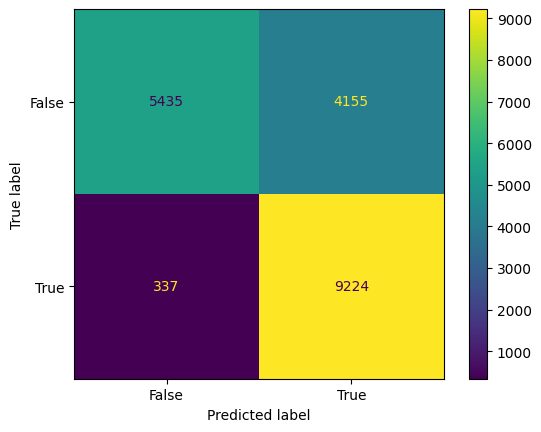

In [ ]:
import sklearn.metrics as skmet
cmat=skmet.confusion_matrix(y_test,predictions)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmat, display_labels = [False, True])
cmat=skmet.confusion_matrix(y_test,predictions)
cm_display.plot()
plt.show()

# Gridsearch:
**The machine learning find the optimal hyperparameters for a model. It helps improve model performance by systematically exploring different combinations of hyperparameter values and selecting the combination that yields the best results.**

hyperparameter trade-off     
Gread Search Cross-Validation     
C - achieving a low training error and a low testing error.0.1 week regulation<br>
gamma - controls the width of the radial basis function     
RFB: Radial Basis Function (linear, sigmoid, poly)     

In [ ]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01], 'kernel': ['sigmoid']}
print(classification_report(y_test,predictions))

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      9590
           1       0.69      0.96      0.80      9561

    accuracy                           0.77     19151
   macro avg       0.82      0.77      0.76     19151
weighted avg       0.82      0.77      0.76     19151

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  27.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  27.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  27.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  27.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  27.7s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=  26.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=  25.9s
[CV] END ...................C=0.1, gamma=0.1, 

**Grid Search Cross-Validation:**

Improved Model Performance: By systematically exploring different hyperparameter values, you are more likely to find the optimal settings that lead to better model performance.
Reduced Overfitting: Cross-validation helps prevent overfitting by evaluating the model on multiple subsets of the data.
Automation: Grid search automates the process of hyperparameter tuning, saving you time and effort.

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
grid.best_params_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[5569 4021]
 [ 632 8929]]
              precision    recall  f1-score   support

           0       0.90      0.58      0.71      9590
           1       0.69      0.93      0.79      9561

    accuracy                           0.76     19151
   macro avg       0.79      0.76      0.75     19151
weighted avg       0.79      0.76      0.75     19151



In [ ]:
tmdb_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63834 entries, 0 to 82871
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  63834 non-null  int64  
 1   id                    63834 non-null  float64
 2   number_of_episodes    63834 non-null  float64
 3   vote_count            63834 non-null  float64
 4   first_air_date        63834 non-null  int64  
 5   last_air_date         63834 non-null  int64  
 6   type                  63834 non-null  int64  
 7   genres                63834 non-null  int64  
 8   created_by            63834 non-null  int64  
 9   languages             63834 non-null  int64  
 10  networks              63834 non-null  int64  
 11  origin_country        63834 non-null  int64  
 12  production_companies  63834 non-null  int64  
 13  air_time              63834 non-null  float64
 14  log_popularity        63834 non-null  float64
 15  total_runtime         63

# SVC - Support Vector Classifier
finding an optimal hyperplane that best separates data points into different classes.

In [ ]:
model = SVC(C=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.7687711210079896

In [ ]:
model.score(X_test, y_test)

0.7654430578037701

# SVR - Support Vector Regressor

The principles as the Support Vector Classifier (SVC) but is adapted to predict continuous target variables instead of discrete classes.



In [ ]:
# Using 'tmdb_model' as DataFrame that contains the features and 'popularity' is a column

# Selecting the features  to include in df2
features = [col for col in tmdb_model.columns if col != 'popularity']  # Exclude the target variable

# Create df2 using the selected features
df2 = tmdb_model[features].copy()

# Add the popularity column to the DataFrame
df2['popularity'] = tmdb_model['popularity']

y=df2['popularity']
X = df2.drop(columns=['popularity'])

from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

model1 = SVR()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1.fit(X_train,y_train)

predictions1 = model1.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, predictions1)
mse = mean_squared_error(y_test, predictions1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions1)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(predictions1)))

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.3f}")

Mean Absolute Error (MAE): 0.322
Mean Squared Error (MSE): 0.232
Root Mean Squared Error (RMSE): 0.482
R-squared (R²): 0.119
Root Mean Squared Logarithmic Error (RMSLE): 0.219


# Classification Models

#  Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,  export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

models_list = pd.DataFrame()

mod1 = LinearRegression() # Use Linear Regression for continuous target
mod1.fit(X,y)

pred1 = mod1.predict(X)

# For regression, use metrics like MSE, MAE, R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, pred1)
mae = mean_absolute_error(y, pred1)
r2 = r2_score(y, pred1)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.214
Mean Absolute Error (MAE): 0.314
R-squared (R²): 0.183


# Decision Tree

In [ ]:
# Using DecisionTreeRegressor for continuous targets
from sklearn.tree import DecisionTreeRegressor

mod2 = DecisionTreeRegressor(random_state=1) # Changed to DecisionTreeRegressor
mod2.fit(X, y)

pred2 = mod2.predict(X)

# For regression, use metrics like MSE, MAE, R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, pred2)
mae = mean_absolute_error(y, pred2)
r2 = r2_score(y, pred2)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.000
Mean Absolute Error (MAE): 0.000
R-squared (R²): 1.000


# Linear Regression:

Type: Linear regression is a classic and widely used regression model that assumes a linear relationship between the features and the target variable (popularity).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'tmdb_model' is your DataFrame
# Select features and target variable
features = ['vote_count','number_of_episodes','success','log_popularity']
target = 'popularity'

X = tmdb_model[features]
y = tmdb_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
#model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction: Create a sample data point for prediction
# Ensure the columns are in the same order as in X_train
# sample_data = pd.DataFrame({'success': [8.5], 'vote_count': [1000], 'number_of_episodes': [30],'log_popularity':[100]}) # This line is changed below
sample_data = pd.DataFrame([[1000, 30, 8.5, 100]],  # Values are reordered here to match features order
                           columns=features) # Using features list to ensure correct order

# Predict popularity for the sample data
predicted_popularity = model.predict(sample_data)
print(f"Predicted Popularity for sample data: {predicted_popularity[0]}")

Mean Squared Error: 0.0011433529131249646
R-squared: 0.9956359072365749
Predicted Popularity for sample data: 332.9698910184603


#Random Forest Regressor:

Type: An ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and robustness.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

# Assuming 'tmdb_filtered' is your DataFrame
# Select features and target variable
features = ['vote_count','number_of_episodes','success','log_popularity']
target = 'popularity'

X = tmdb_model[features]
y = tmdb_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
#model = LinearRegression()
model=RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction:
# Create a sample data point for prediction
# Ensure the columns match the features used during training
sample_data = pd.DataFrame([[1000, 30, 8.5, 100]], columns=features) # Using the same features and order

# Predict popularity for the sample data
predicted_popularity = model.predict(sample_data)
print(f"Predicted Popularity for sample data: {predicted_popularity[0]}")

Mean Squared Error: 9.291916889653147e-09
R-squared: 0.9999999645334465
Predicted Popularity for sample data: 3.019736191187483


# Create and train the XGBoost model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming tmdb_model is your DataFrame with features and target variable 'popularity'

# 1. Define features (X) and target (y)
X = tmdb_model.drop('popularity', axis=1)  # Features (all columns except 'popularity')
y = tmdb_model['popularity']  # Target variable

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Specify regression objective
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage used in update to prevents overfitting
    max_depth=3,  # Maximum depth of a tree
    subsample=0.8,  # Subsample ratio of the training instance
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42  # Random seed for reproducibility
)

xgb_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# 6. (Optional) Feature Importance
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Root Mean Squared Error (RMSE): 0.010165061668133954
R-squared (R2): 0.9996056029061123

Feature Importance:
                 Feature  Importance
14        log_popularity    0.574436
16               success    0.240709
3             vote_count    0.091400
2     number_of_episodes    0.051979
10              networks    0.025029
15         total_runtime    0.008005
5          last_air_date    0.002612
9              languages    0.002341
0                   name    0.001292
6                   type    0.000764
1                     id    0.000759
8             created_by    0.000315
13              air_time    0.000312
7                 genres    0.000027
4         first_air_date    0.000020
11        origin_country    0.000000
12  production_companies    0.000000


# Models Selection and finetuning

In [ ]:
tmdb_model.isna().sum()

,0
name,0
id,0
number_of_episodes,0
vote_count,0
first_air_date,0
last_air_date,0
type,0
genres,0
created_by,0
languages,0


# TMDB Regression Models and Regression Metrics

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res


# Regression Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost

X = tmdb_model.loc[:,tmdb_model.columns != 'popularity']
y = tmdb_model['popularity']

# Linear Regression

In [ ]:
mod1 = LinearRegression()
mod1.fit(X,y)

pred1 = mod1.predict(X)
regressionMetrics(y, pred1)

{'MSE': 0.21391857878582446,
 'RMSE': 0.4625133282250626,
 'MAE': 0.3138446238304541,
 'RMSLE': 0.21503793007277897}

In [ ]:
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred1)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,0.213919,0.462513,0.313845,0.215038
1,Linear Regression,0.213919,0.462513,0.313845,0.215038
2,Linear Regression,0.213919,0.462513,0.313845,0.215038
3,Linear Regression,0.213919,0.462513,0.313845,0.215038
4,Linear Regression,0.213919,0.462513,0.313845,0.215038


<Axes: xlabel='popularity'>

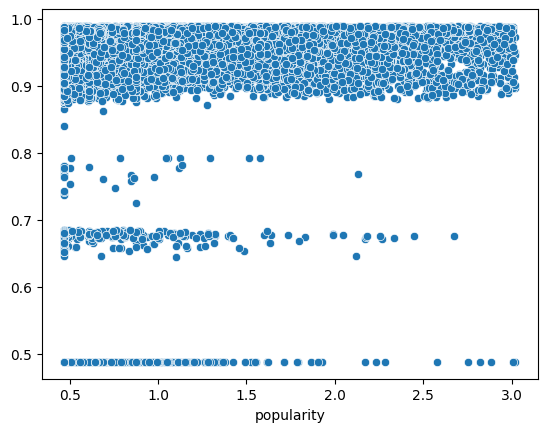

In [ ]:
sns.scatterplot(x=y, y=pred1)

# Decision Tree

In [ ]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [ ]:
pred2 = mod2.predict(X)
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
1,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
2,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
3,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
4,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
5,Decision Tree,1.453399e-27,3.812347e-14,2.436926e-14,2.592382e-14


<Axes: xlabel='popularity'>

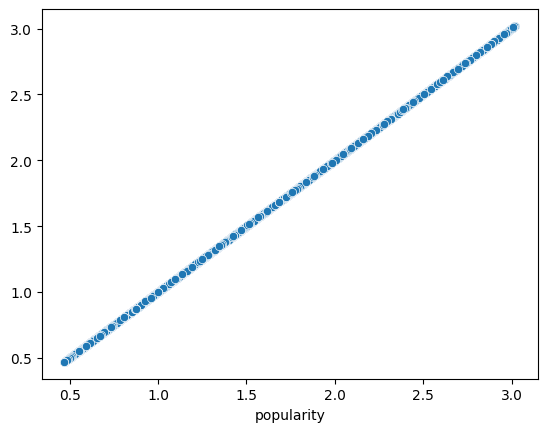

In [ ]:
sns.scatterplot(x=y, y=pred2)

# Random Forest

In [ ]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X,y)

RandomForestRegressor(random_state=1)

In [ ]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
1,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
2,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
3,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
4,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
5,Decision Tree,1.453399e-27,3.812347e-14,2.436926e-14,2.592382e-14
6,RandomForest,1.491010e-09,3.861360e-05,9.527787e-06,1.161402e-05


<Axes: xlabel='popularity'>

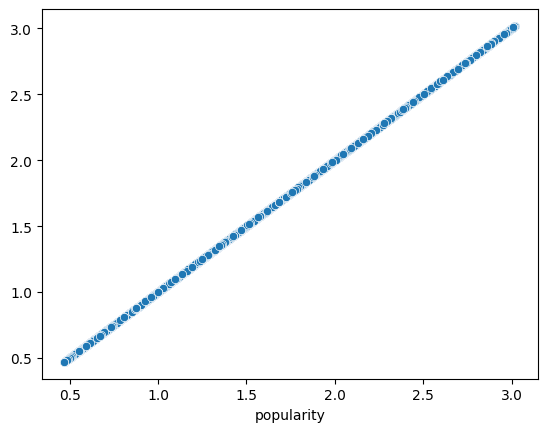

In [ ]:
sns.scatterplot(x=y, y=pred3)

# Adaptive Boosting (ADABoost)

In [ ]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X,y)

AdaBoostRegressor(random_state=1)

In [ ]:
pred4 = mod4.predict(X)
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
1,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
2,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
3,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
4,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
5,Decision Tree,1.453399e-27,3.812347e-14,2.436926e-14,2.592382e-14
6,RandomForest,1.491010e-09,3.861360e-05,9.527787e-06,1.161402e-05
7,ADABoost,1.277911e-03,3.574789e-02,3.224331e-02,2.222740e-02


<Axes: xlabel='popularity'>

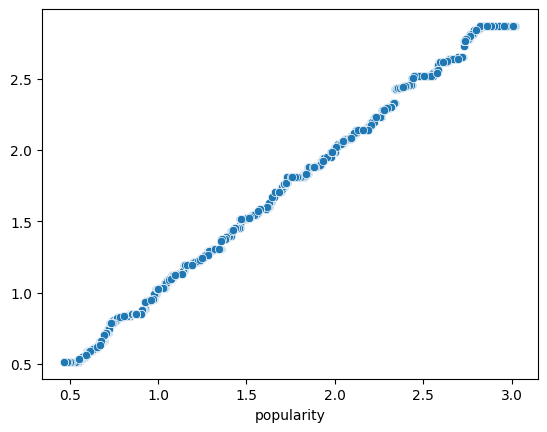

In [ ]:
sns.scatterplot(x=y, y=pred4)

# Gradient Boosting Machine (GBM)

In [ ]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X,y)

GradientBoostingRegressor(random_state=1)

In [ ]:
pred5 = mod5.predict(X)
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
1,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
2,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
3,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
4,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
5,Decision Tree,1.453399e-27,3.812347e-14,2.436926e-14,2.592382e-14
6,RandomForest,1.491010e-09,3.861360e-05,9.527787e-06,1.161402e-05
7,ADABoost,1.277911e-03,3.574789e-02,3.224331e-02,2.222740e-02
8,GBM,1.047567e-05,3.236614e-03,1.637254e-03,1.378501e-03


<Axes: xlabel='popularity'>

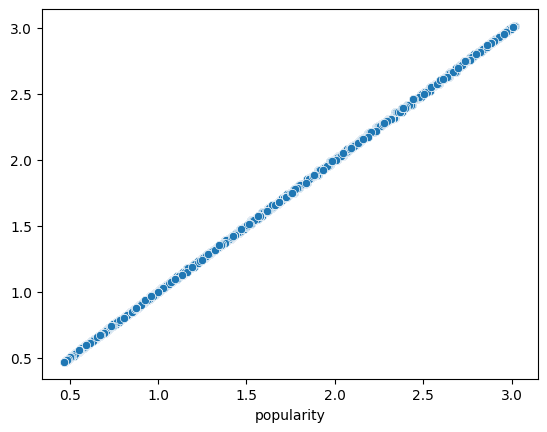

In [ ]:
sns.scatterplot(x=y, y=pred5)

# Support Vector Machine (SVM)

In [ ]:
mod6 = SVR()
mod6.fit(X,y)

SVR()

In [ ]:
pred6 = mod6.predict(X)
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
1,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
2,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
3,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
4,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
5,Decision Tree,1.453399e-27,3.812347e-14,2.436926e-14,2.592382e-14
6,RandomForest,1.491010e-09,3.861360e-05,9.527787e-06,1.161402e-05
7,ADABoost,1.277911e-03,3.574789e-02,3.224331e-02,2.222740e-02
8,GBM,1.047567e-05,3.236614e-03,1.637254e-03,1.378501e-03
9,SVM,2.290551e-01,4.785970e-01,3.197113e-01,2.169779e-01


<Axes: xlabel='popularity'>

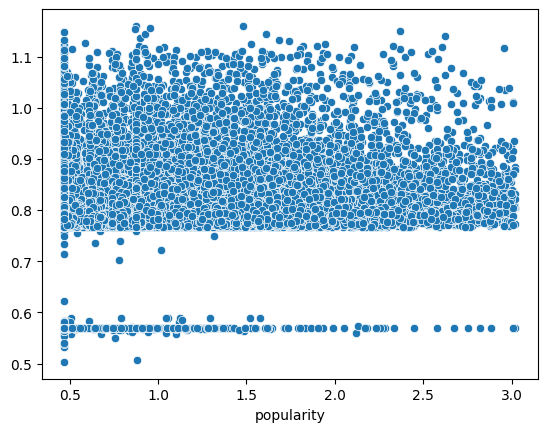

In [ ]:
sns.scatterplot(x=y, y=pred6)

# XGBoost Regressor

In [ ]:
mod7= xgb.XGBRegressor()
mod7.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred7 = mod7.predict(X)
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred7)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
1,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
2,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
3,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
4,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
5,Decision Tree,1.453399e-27,3.812347e-14,2.436926e-14,2.592382e-14
6,RandomForest,1.491010e-09,3.861360e-05,9.527787e-06,1.161402e-05
7,ADABoost,1.277911e-03,3.574789e-02,3.224331e-02,2.222740e-02
8,GBM,1.047567e-05,3.236614e-03,1.637254e-03,1.378501e-03
9,SVM,2.290551e-01,4.785970e-01,3.197113e-01,2.169779e-01


<Axes: xlabel='popularity'>

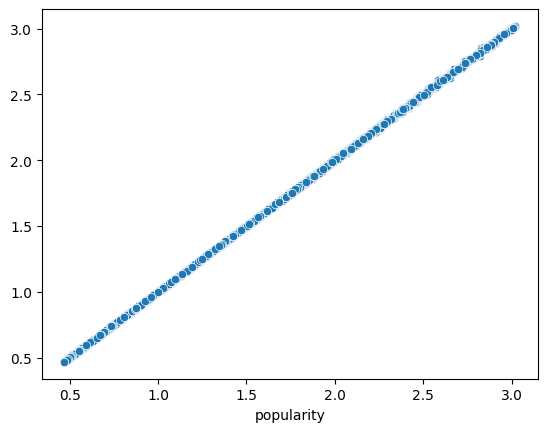

In [ ]:
sns.scatterplot(x=y, y=pred7)

# Model Selection
**Metrics:**

MSE - Mean Squared Error

RMSE Root Mean Squared Error

MAE Mean Absolute Error - Calculates the average of the absolute differences between predicted and actual values.

RMSLE Root Mean Squared Logarithmic Error

In [ ]:
models_list.sort_values('MAE')

,model,MSE,RMSE,MAE,RMSLE
5,Decision Tree,1.453399e-27,3.812347e-14,2.436926e-14,2.592382e-14
6,RandomForest,1.491010e-09,3.861360e-05,9.527787e-06,1.161402e-05
10,XGB,3.991725e-06,1.997930e-03,9.879252e-04,7.788089e-04
8,GBM,1.047567e-05,3.236614e-03,1.637254e-03,1.378501e-03
7,ADABoost,1.277911e-03,3.574789e-02,3.224331e-02,2.222740e-02
0,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
1,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
2,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
3,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
4,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01


In [ ]:
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,RMSLE
5,Decision Tree,1.453399e-27,3.812347e-14,2.436926e-14,2.592382e-14
6,RandomForest,1.491010e-09,3.861360e-05,9.527787e-06,1.161402e-05
10,XGB,3.991725e-06,1.997930e-03,9.879252e-04,7.788089e-04
8,GBM,1.047567e-05,3.236614e-03,1.637254e-03,1.378501e-03
7,ADABoost,1.277911e-03,3.574789e-02,3.224331e-02,2.222740e-02
0,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
1,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
2,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
3,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
4,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01


In [ ]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Serch Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
#Verbose - level of details that will be provided in each iteration
# Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
579 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py"

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

# Finding the Best Parameters and Best Score

In [ ]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: -0.9958655119784239


# XGBoost Finetuning

Fitting x folds Performing x-fold

Candidatescross-validation on numner of hyperparameter combinations

Totalling resulting in 1,944 total model training and evaluation runs.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Assuming X and y are defined here (dataframes/arrays containing training data and target variable)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
#Verbose - level of details that will be provided in each iteration
# Fit the grid search to the data
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Make predictions
pred8 = grid_search.predict(X)

model_dict = {'model': "XGB_FT"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred8)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
366 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py"

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: -0.9959076032859281


,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
1,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
2,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
3,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
4,Linear Regression,2.139186e-01,4.625133e-01,3.138446e-01,2.150379e-01
5,Decision Tree,1.453399e-27,3.812347e-14,2.436926e-14,2.592382e-14
6,RandomForest,1.491010e-09,3.861360e-05,9.527787e-06,1.161402e-05
7,ADABoost,1.277911e-03,3.574789e-02,3.224331e-02,2.222740e-02
8,GBM,1.047567e-05,3.236614e-03,1.637254e-03,1.378501e-03
9,SVM,2.290551e-01,4.785970e-01,3.197113e-01,2.169779e-01


# Cross-Validation:

# 1. k-Fold Cross-Validation

Reasoning: k-Fold Cross-Validation is a widely used technique that provides a robust estimate of model performance. It involves splitting your data into 'k' equal-sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated 'k' times, with each fold serving as the test set once. The performance metric (e.g., R-squared, MAE) is averaged across all iterations to obtain a more reliable performance estimate.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression # Or any other model you're using
from sklearn.metrics import mean_squared_error

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

kf = KFold(n_splits=5) # Create a KFold object with 5 folds
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression() # Initialize your model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    scores.append(mean_squared_error(y_test, y_pred))

average_score = np.mean(scores)
print(f"Average MSE across 5 folds: {average_score}")

Average MSE across 5 folds: 0.0011435164713031601


# 2. Stratified k-Fold Cross-Validation

This technique is particularly useful when you have imbalanced classes in your target variable (although your target 'popularity' might be continuous). Stratified k-Fold ensures that each fold maintains the same proportion of target classes as the original dataset, leading to a more representative performance estimate, especially for minority classes.

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold  # Use KFold for continuous target
from sklearn.linear_model import LinearRegression  # Use Linear Regression for continuous target
from sklearn.metrics import mean_squared_error  # Use MSE for regression
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

kf = KFold(n_splits=5)  # Change to KFold
scores = []

for train_index, test_index in kf.split(X):  # Remove y from split
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Use Linear Regression for continuous target 'popularity'
    model = LinearRegression()  # Initialize your model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    # Use mean_squared_error for regression
    scores.append(mean_squared_error(y_test, y_pred))

average_score = np.mean(scores)
print(f"Average MSE across 5 folds: {average_score}")

Average MSE across 5 folds: 0.0011435164713031601


# Optimize the hyperparameters for Linear Regression model using Grid Search:

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False] # Only if you want to restrict coefficients to be positive
    # Add other hyperparameters you want to tune if applicable to your model
}

# Create the model
model = LinearRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use a suitable scoring metric for regression
    cv=KFold(n_splits=5),  # Use KFold for cross-validation
    n_jobs=-1  # Use all available CPU cores for faster computation
)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Score (Negative MSE): {best_score}")

# Train the model with the best hyperparameters
best_model = LinearRegression(**best_params)
best_model.fit(X, y)  # You can use your train/test split here as well

# Now you can use 'best_model' for predictions

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best Score (Negative MSE): -0.0011435164713031601


LinearRegression()

# 7. Models Evaluations

# Linear Regresion - Evaluate the model using appropriate metrics such as accuracy, precision, recall, F1-score, ROC-AUC for classification, or RMSE, MAE for regression.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()  # You can use your best_model from hyperparameter tuning here
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 0.033810025304021475
Mean Absolute Error (MAE): 0.01933106670912934
R-squared (R2): 0.9956368046036214


# Random Forest Regresion - Evaluate the model using appropriate metrics such as accuracy, precision, recall, F1-score, ROC-AUC for classification, or RMSE, MAE for regression.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)  # You can add hyperparameters here
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 0.00010136745292410014
Mean Absolute Error (MAE): 2.4035738406390035e-05
R-squared (R2): 0.9999999607797155


## Model Validation:
 Validate the model on a separate validation set to ensure it generalizes well to unseen data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Or any other model you're using
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'tmdb_model' is your DataFrame with features and target
X = tmdb_model[['log_popularity','success','number_of_episodes', 'networks', 'vote_count']]
y = tmdb_model['popularity']

# 1. Split data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# 0.25 x 0.8 = 0.2

# 2. Create and train the model on the training set
model = RandomForestRegressor(random_state=42)  # Or your other model
model.fit(X_train, y_train)

# 3. Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Set Performance:")
print(f"RMSE: {rmse_val}")
print(f"MAE: {mae_val}")
print(f"R2: {r2_val}")

# 4. (Optional) If satisfied with validation performance, evaluate on the test set
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R2: {r2_test}")

Validation Set Performance:
RMSE: 0.00013220532933579611
MAE: 3.526624935910509e-05
R2: 0.9999999339246933

Test Set Performance:
RMSE: 0.0001269104306126755
MAE: 3.3515259584645324e-05
R2: 0.9999999385236172


# Download 'tmdb_dep' Dataset  Using Pickel file to Google Drive
Saving the Model 'random_forest_model.pkl'

In [ ]:
# Import necessary libraries
import pickle
from google.colab import drive

# Save tmdb_filtered as tmdb_eng

tmdb_dep=tmdb_model

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_ready DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_dep, file)
  print(f"tmdb_dep saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_dep is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_dep saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl


# Import pickel file 'tmdb_dep.pkl' from Google Drive

In [ ]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_dep = pickle.load(file)
    print(f"tmdb_model loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_model)
    # For example, you can display the first few rows:
    print(tmdb_dep.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_model loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl successfully.
   name        id  number_of_episodes  vote_count       first_air_date  \
0    11   39280.0           -0.737903   -0.407878 -9223372036854775808   
1    43  222838.6           -0.362186    0.741789  1685232000000000000   
2   279  222838.6            0.013532   -0.407878  1400112000000000000   
3     1   34835.0            0.163818    3.424345  1160092800000000000   
4  5774   42598.0           -0.737903   -0.407878 -9223372036854775808   

         last_air_date  type  genres  created_by  languages  networks  \
0 -9223372036854775808     4      40       13284          7       178   
1  1687651200000000000     4      40       13302         20       169   
2  1405555200000000000     4      40       13284          7       178   
3  1166745600000000000    